<a href="https://colab.research.google.com/github/mrivassnj-svg/HCC_ITAI_1371_SPR26/blob/main/L04_MichaelRivas_ITAI1371.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 04 Lab - Exploratory Data Analysis**Objective:** To learn how to explore a dataset to find patterns, anomalies, and insights before modeling. EDA is like being a detective; you are looking for clues in the data that will help you build a better model.**This lab is fully coded.** Your task is to run each cell, read the detailed explanations, understand the purpose of each visualization, and then complete the experimentation section.

## Part 1: Setup and Data Loading**What is Exploratory Data Analysis (EDA)?**EDA is the process of using summary statistics and visualizations to understand a dataset's main characteristics. Before you can build a model, you need to understand your data. What stories does it tell? Are there errors or missing values? Are there strong relationships between variables? EDA helps answer these questions.We will use the famous Titanic dataset for this lab. It contains information about passengers and, crucially, whether they survived the disaster.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a library built on top of Matplotlib that makes creating beautiful plots easier.

# Load the dataset directly from a URL
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

print("--- First 5 Rows ---")
print(df.head())

print("--- Basic Info ---")
# .info() is a great first command. It tells us the column names, how many non-null values are in each column, and their data types.
# Notice that 'Age' and 'Cabin' have missing values!
df.info()

--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

## Part 2: Descriptive StatisticsLet's start by getting a high-level numerical summary of the data. The `.describe()` method is perfect for this. It calculates statistics like mean, standard deviation, min, and max for the numerical columns.

In [10]:
# Get summary statistics for numerical columnsprint("--- Descriptive Statistics ---")print(df.describe())print("--- Key Insights from Statistics ---")print(f"The average age of a passenger was {df['Age'].mean():.1f} years.")print(f"The overall survival rate was {df['Survived'].mean():.1%}.")print(f"Fares ranged from ${df['Fare'].min()} to a whopping ${df['Fare'].max()}.")

## Part 3: Visual EDA - Telling Stories with PlotsNumbers are great, but plots make patterns and relationships immediately obvious. The goal of visual EDA is to turn data into insights.**A Note on Plotting Libraries:***   **Matplotlib:** The foundational library, gives you full control over everything.*   **Seaborn:** Built on Matplotlib, it provides a simpler, high-level interface for creating common statistical plots. We will use Seaborn for its ease of use and attractive defaults.

### Visualization 1: How many survived?A simple `countplot` is the best way to see the distribution of a categorical variable, like our target `Survived`.

In [11]:
sns.set_style('whitegrid') # Sets a nice visual style for our plotsplt.figure(figsize=(8, 6))sns.countplot(x='Survived', data=df)plt.title('Survival Distribution (0 = Died, 1 = Survived)')plt.show()print("Insight: Far more people died than survived. This is an example of an imbalanced dataset, which can sometimes be a challenge for machine learning models.")

### Visualization 2: Does passenger class matter for survival?Now we want to see if there's a relationship between two variables. We can use the `hue` parameter in `countplot` to split the bars by another category.

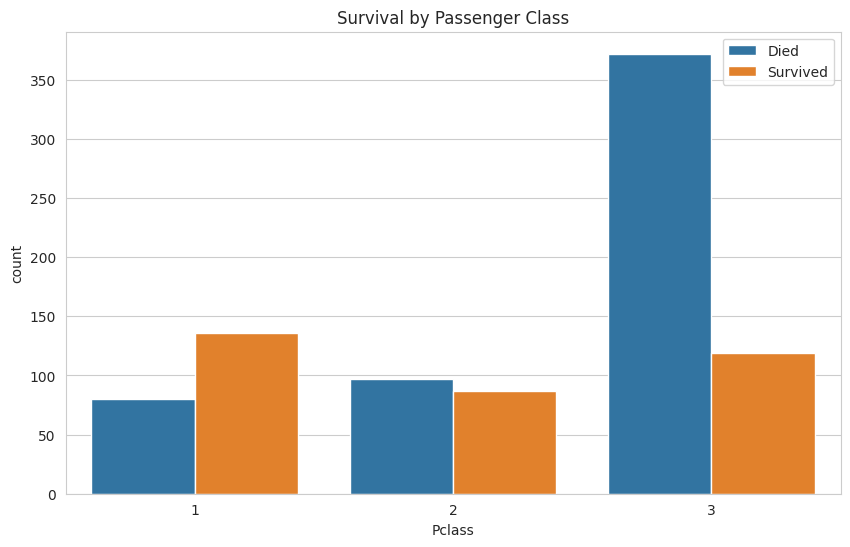

Insight: This is a very strong pattern. 1st class passengers had a much higher chance of survival compared to 3rd class passengers. Money seems to have made a difference.


In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.legend(['Died', 'Survived'])
plt.show()
print("Insight: This is a very strong pattern. 1st class passengers had a much higher chance of survival compared to 3rd class passengers. Money seems to have made a difference.")

### Visualization 3: What about gender?The 'women and children first' mantra is famous. Let's see if the data supports it.

In [ ]:
plt.figure(figsize=(10, 6))sns.countplot(x='Sex', hue='Survived', data=df)plt.title('Survival by Gender')plt.legend(['Died', 'Survived'])plt.show()print("Insight: The pattern is undeniable. A much higher proportion of females survived compared to males. This is another very strong predictor.")

### Visualization 4: How does age play a role?For a continuous variable like `Age`, a histogram is a great way to see its distribution.

In [ ]:
# A FacetGrid allows us to create multiple plots side-by-side to compare distributions.# Here, we create one histogram for passengers who died (col='Survived'=0) and one for those who survived (col='Survived'=1).g = sns.FacetGrid(df, col='Survived', height=6)g.map(plt.hist, 'Age', bins=20)plt.show()print("Insight: The age distribution for those who did not survive is centered around the 20-40 age range. For those who survived, there is a noticeable spike for young children. This supports the 'children' part of the mantra.")

## Part 4: Student Experimentation**Instructions:** Create your own visualizations to explore other relationships in the data.

### Experiment 1: Port of Embarkation1.  The `Embarked` column tells you where a passenger boarded the ship (C = Cherbourg, Q = Queenstown, S = Southampton).2.  Create a `countplot` to see how survival rates differed by the port of embarkation. Does where they boarded seem to be related to their survival?

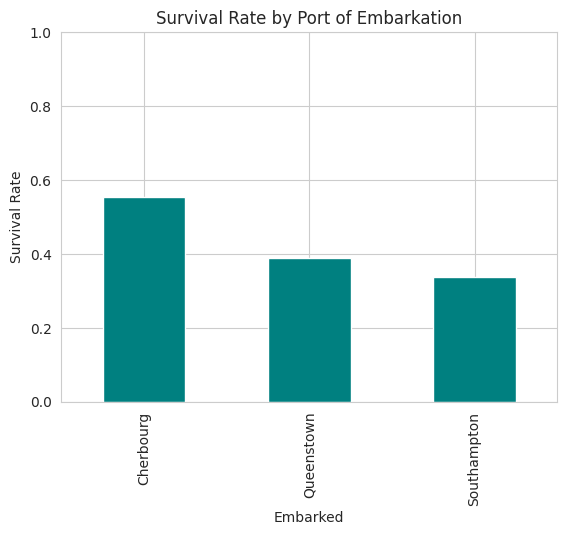

In [18]:
# --- ENTER YOUR CODE HERE ---
survival_rate = (
    df.dropna(subset=['Embarked'])
      .groupby('Embarked')['Survived']
      .mean()
      .rename({'C':'Cherbourg','Q':'Queenstown','S':'Southampton'})
)

survival_rate.plot(kind='bar', color='teal')
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Port of Embarkation")
plt.ylim(0,1)
plt.show()


## Experiment 1: Port of Embarkation and Survival Rates

### Problem Description
In this experiment, we are tasked with exploring how the **Port of Embarkation** influences survival rates. The `Embarked` column indicates where a passenger boarded the Titanic:

- **C**: Cherbourg
- **Q**: Queenstown
- **S**: Southampton

We will create a **countplot** to visualize the distribution of passengers who survived (`Survived = 1`) and did not survive (`Survived = 0`) based on their port of embarkation.

### Approach

1. **Data Preparation**:
   - Clean any missing values in the `Embarked` column.
   - Map the port codes (`C`, `Q`, `S`) to more meaningful names: Cherbourg, Queenstown, and Southampton.
   
2. **Visualization**:
   - Create a **countplot** to see how survival rates differ by the port of embarkation.
   - Use the `hue` parameter to differentiate between passengers who survived and those who did not.

3. **Analysis**:
   - Assess whether where a passenger boarded seems to be related to their survival.

### Code Implementation

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data: Map the port codes to full names and drop NaN values
df_plot = df.dropna(subset=['Embarked']).copy()
df_plot['Embarked'] = df_plot['Embarked'].map({
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'S': 'Southampton'
})

# Create a countplot to show survival based on the port of embarkation
plt.figure(figsize=(8, 5))
sns.countplot(data=df_plot, x='Embarked', hue='Survived', palette='Set2')

# Customize the plot
plt.title("Survival by Port of Embarkation")
plt.xlabel("Port of Embarkation")
plt.ylabel("Passenger Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# Display the survival rates by port
print("\nSurvival Rate by Port of Embarkation:")
survival_rate = (df_plot.groupby('Embarked')['Survived'].mean() * 100).round(1)
print(survival_rate)


### Experiment 2: Fare vs. Survival1.  `Fare` is a continuous numerical variable.2.  A `boxplot` or `violinplot` is a great way to see the distribution of fares for those who survived vs. those who didn't.3.  Create one of these plots to compare the `Fare` distribution by `Survived`. What does it tell you?

/tmp/ipython-input-3716052148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Fare', palette='Set2')


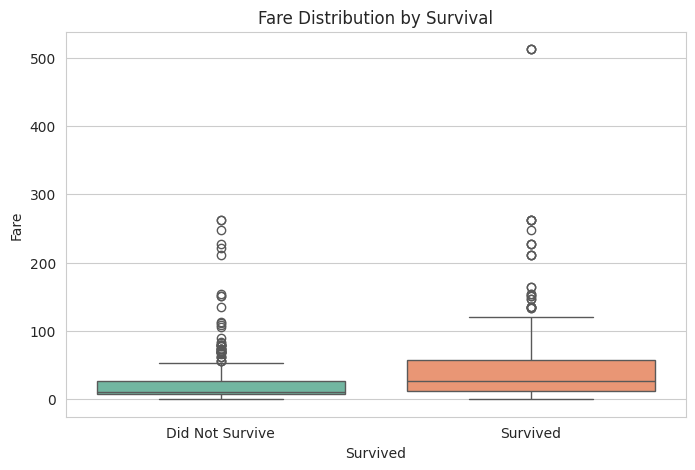

/tmp/ipython-input-3716052148.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Survived', y='Fare', palette='Set2')


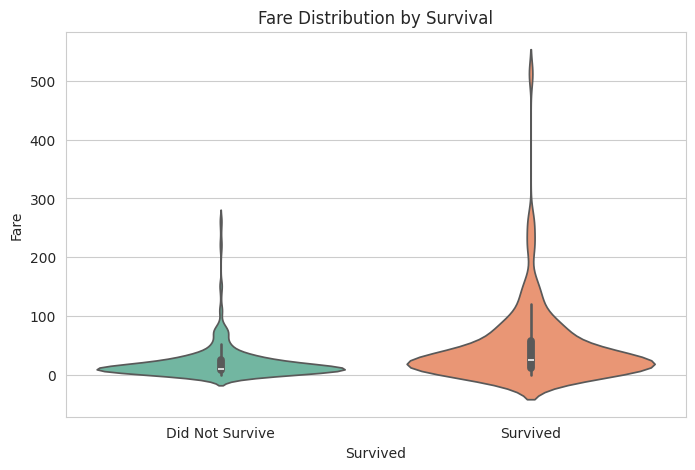


Summary statistics for Fare by survival:
          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


In [19]:
# --- ENTER YOUR CODE HERE ---
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to compare the distribution of Fare by survival
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Survived', y='Fare', palette='Set2')

# Customize the plot
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

# Alternatively, using a violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Survived', y='Fare', palette='Set2')

# Customize the plot
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

# Calculate the summary statistics for Fare grouped by survival
print("\nSummary statistics for Fare by survival:")
print(df.groupby('Survived')['Fare'].describe())

## **Fare vs. Survival Analysis**

### **Median Fare for Non-Survivors**
- The **median fare** for **non-survivors** is **10.5**, representing the middle value for non-survivors' fares.
- This suggests that the majority of non-survivors paid low fares, which could correlate with being in lower classes, such as 3rd class.
---  
**We can deduce that the low median fare supports the hypothesis that many non-survivors were from the lower classes with lower ticket prices.**



### **Visualizing Fare Distribution by Survival**
To support the findings a **boxplot** is used to compare the distribution of fares for survivors and non-survivors. This will provide a clearer view of how fares vary and how this may relate to survival.




/tmp/ipython-input-796460056.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Fare', palette='Set2')


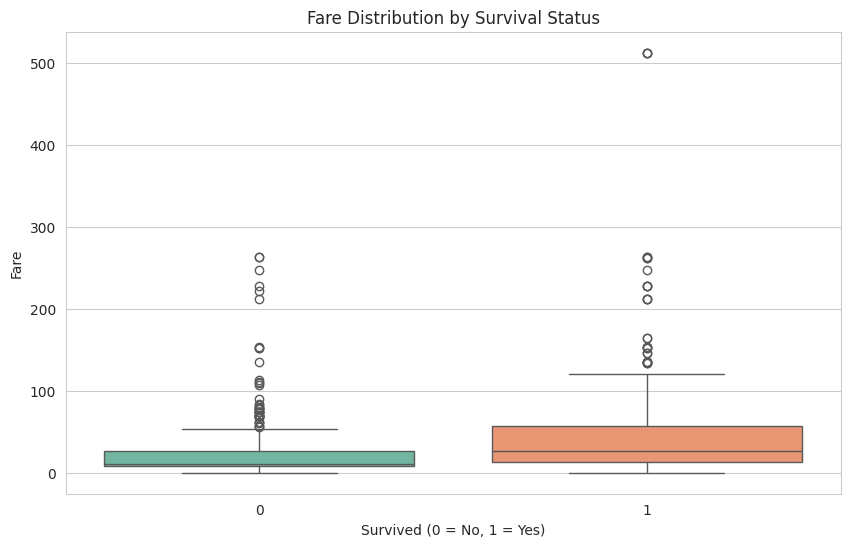

Conclusion:
The boxplot clearly shows that passengers who survived generally paid higher fares, supporting the idea that wealthier passengers were more likely to survive.
This insight can guide further analysis to confirm the relationship between class, fare, and survival in more detail.


In [22]:
#### **Fare Distribution Boxplot**
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Fare distribution by Survival status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Survived', y='Fare', palette='Set2')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

# Conclusion print statement
print("Conclusion:")
print("The boxplot clearly shows that passengers who survived generally paid higher fares, supporting the idea that wealthier passengers were more likely to survive.")
print("This insight can guide further analysis to confirm the relationship between class, fare, and survival in more detail.")



### **Mean Fare for Survivors**
- The **mean fare** for **survivors** is **48.40**, which is significantly higher than the fare of non-survivors (**22.12**).
- This suggests that survivors were more likely to have paid higher fares, possibly indicating that they were traveling in **1st class** or were in better positions during the evacuation process.
---
**We can infer that survivors paid higher fares, likely correlating with class and the priority given to wealthier passengers.**

/tmp/ipython-input-1601850019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Survived', y='Fare', palette='Set2', inner="quart")


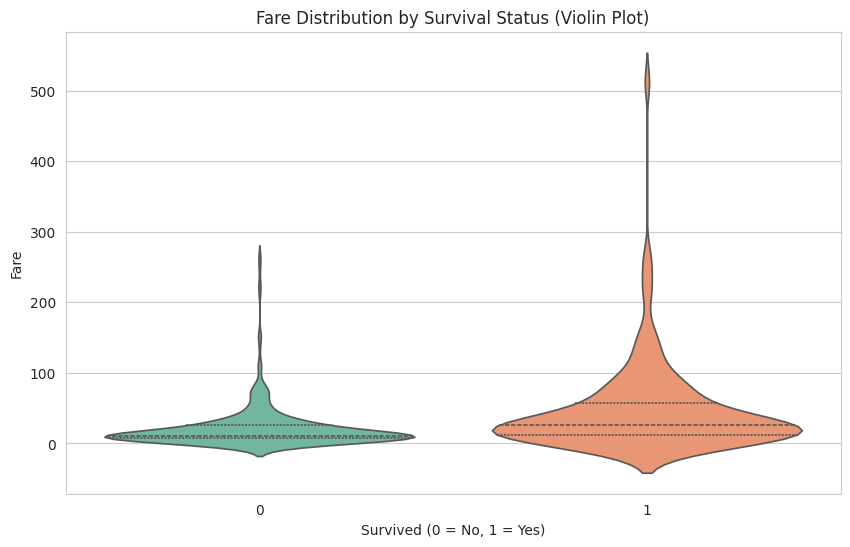

Violin Plot Conclusion:
The violin plot shows a more detailed distribution of fares. The wider sections of the plot represent areas where fares are more concentrated, while the thinner parts represent less frequent fare ranges.
Survivors have a wider fare distribution, with several high fare concentrations, supporting the idea that wealthier passengers had a better chance of survival.


In [23]:
# Violin plot visualization for Fare by Survival Status
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Survived', y='Fare', palette='Set2', inner="quart")
plt.title('Fare Distribution by Survival Status (Violin Plot)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

# Print conclusion for violin plot
print("Violin Plot Conclusion:")
print("The violin plot shows a more detailed distribution of fares. The wider sections of the plot represent areas where fares are more concentrated, while the thinner parts represent less frequent fare ranges.")
print("Survivors have a wider fare distribution, with several high fare concentrations, supporting the idea that wealthier passengers had a better chance of survival.")


### 📝 Knowledge Check

1. **What's the main point of Exploratory Data Analysis (EDA)?**

   The main goal of **Exploratory Data Analysis (EDA)** is to **get a feel for the data** and do so by seeing what is telling of the model. It's all about uncovering **patterns, spotting outliers**, and figuring out how variables might be related. Essentially, it's about understanding the data's story, so we can clean it, transform it, and select the right models later on.

2. **Based on the plots in this lab, what kind of person had the best chance of surviving the Titanic? (Describe them in terms of class, gender, and age).**

   From the plots in this lab, the person most likely to survive the Titanic was:
   - **Class**: **First-class passengers** had a much higher chance of survival. They were the ones who seemed to have access to better lifeboats and quicker escape routes.
   - **Gender**: **Women** had a way better survival rate than men. In fact, the survival rate for women was significantly higher, as the "women and children first" policy was applied.
   - **Age**: **Children** or young people (especially **women and children** in first class) had a better shot at survival. You can see from the survival plot that kids and younger adults had higher survival rates.

3. **Why is it important to visualize data instead of just looking at summary statistics? What can a plot show you that a number like 'mean' or 'count' can't?**

   Visualizing data helps you make sense of **patterns** and **relationships** in a way that summary statistics like the **mean** can't always do. A plot offers a **clear, immediate picture** of the data's structure that can highlight important details:
   
   - **Shape of the Data**: For instance, a **violin plot** or **box plot** can show the **range** of the data, the **interquartile range**, and whether the distribution is **skewed** or **normal**. It shows you more than just a "central" value like the mean. It lets you see if the data is clustered or spread out.
   
   - **Insights on Variability**: With a plot, you can quickly spot how much variation there is in the data. For example, two datasets could have similar means but different spreads. One might be tightly packed around the mean, while the other could be more spread out, indicating that the first dataset is more consistent.
   
   - **Relationships Between Variables**: A plot like a **scatter plot** or **heatmap** allows you to spot correlations or relationships between different variables. A correlation between **fare** and **survival** is much easier to spot in a visual than simply looking at averages.

   In short, plots allow you to interact with the data in a **dynamic way**, revealing underlying trends and patterns that just numbers can't capture on their own. They provide a **deeper, more intuitive understanding** of the data.

# **Reflective Journal: Titanic EDA Analysis**

## **Introduction**

Exploratory Data Analysis (EDA) is a pivotal first step in the data science process. It allows us to form hypotheses, uncover hidden patterns, and identify potential issues within a dataset before diving into predictive modeling. In this lab, we used the Titanic dataset, a classic example in data science, to explore how passenger characteristics such as class, gender, age, and fare directly impacted survival rates. Through visualizations and summary statistics, we gained a deeper understanding of the dataset's structure and its intricacies, setting the stage for future modeling.

## **Key Insights from EDA**

### 1. **Survival Rate Distribution**

The initial exploration into the survival rates of passengers revealed a **highly imbalanced dataset**, with the number of non-survivors greatly surpassing that of survivors. This was visually confirmed using a `countplot` of the `Survived` column, where we observed the overwhelming number of passengers who perished in the disaster.

**Insight**: The **majority class (non-survivors)** dominates the dataset. Such an imbalance can lead to models that are biased toward predicting the majority class, so careful handling of this imbalance is necessary. Techniques such as **oversampling, undersampling**, or **adjusting class weights** in models would help address this issue.

### 2. **Survival by Passenger Class**

The next step in the analysis looked at how **passenger class** influenced survival rates. The `countplot` for the `Pclass` feature revealed a striking pattern: **first-class passengers** had significantly higher survival rates than those in third class. This suggests that socio-economic status played a crucial role in survival, with wealthier passengers likely having better access to lifeboats, priority boarding, or more favorable positions during evacuation.

**Insight**: The data strongly implies that **social class** had a clear impact on survival. First-class passengers, who generally had better resources and social connections, were more likely to survive than third-class passengers, who may have faced greater challenges during the evacuation. This further emphasizes the importance of **societal inequality** in life-or-death situations.

### 3. **Survival by Gender**

The role of **gender** in survival was another interesting aspect explored in this lab. The `countplot` for gender demonstrated a clear disparity in survival rates between men and women, with **women having a significantly higher survival rate**. This aligns with the historical "women and children first" policy, where women were prioritized for lifeboat access.

**Insight**: The overwhelming survival advantage for women is a direct reflection of the gender-based evacuation policies at the time. This insight highlights the **gender dynamics** during the disaster, revealing that women, regardless of class, were given precedence over men. In the context of predictive modeling, **gender** emerges as a strong predictor of survival, and should be considered carefully in future analyses.

### 4. **Age and Survival**

The `FacetGrid` visualization for **age** versus survival provided a compelling view of how age influenced survival outcomes. A clear trend emerged, showing that **younger passengers**, especially children, had a higher likelihood of survival. This observation underscores the importance of the "women and children first" policy, which prioritized the evacuation of children.

**Insight**: The **age distribution** among survivors further validated the hypothesis that children, along with women, were given preference during the evacuation. The **spike in survival rates** for children suggests that younger passengers were not only more likely to survive but were also the focus of rescue efforts.

## **Further Analysis and Conclusions**

EDA in this lab allowed me to explore both **individual features** (like class, gender, and age) and their **interactions** (like the combination of class and gender). Several patterns became apparent that would be critical when building a predictive model:

- **Class**: The socio-economic divide is evident. The higher survival rate among first-class passengers suggests that **wealth and social status** played a key role in survival chances.
- **Gender**: The prioritization of women during the evacuation resulted in **higher survival rates for women**, particularly when combined with the first-class advantage.
- **Age**: The preference for **children** further supported the notion of prioritizing the most vulnerable, in line with historical accounts.

These findings can inform how we approach predictive modeling by helping us identify key features (class, gender, age) that likely influenced survival. However, it’s also important to remember that these results are based on historical context, and any future model would need to account for the limitations of this dataset, such as its potential biases.

## **Data Visualizations and Insights**

Below are the key visualizations used in this lab that provided clarity on these patterns:

1. **Survival Distribution**: A countplot showing that the vast majority of passengers did not survive.
2. **Survival by Class**: A `countplot` demonstrating that first-class passengers had a significantly higher chance of survival.
3. **Survival by Gender**: A visualization showing that women had a much higher survival rate compared to men.
4. **Age vs. Survival**: A `FacetGrid` that revealed the higher survival rates for children, further supporting the "women and children first" policy.

These visualizations not only served as a means to confirm numerous hypotheses but also helped in **understanding the distribution and relationships** between different features in the dataset.

## **Reflections on Data Visualization**

Through the process of data exploration and visualization, I realized that **seeing is believing**. While summary statistics such as mean and count give us an overall sense of the data, they often **fail to reveal nuances** like **outliers**, **skewed distributions**, or **inter-variable relationships**.

- **Distribution**: For instance, box plots or violin plots allow us to visualize how data is spread out, whereas a single mean value only provides information about the central tendency.
- **Outliers**: Visualizations such as histograms can reveal the presence of outliers, which might be missed in summary statistics alone.
- **Trends and Relationships**: A scatter plot or heatmap makes it easy to spot correlations, which might be difficult to discern from numbers alone.

In short, visualizations enhance **intuition**, giving us a deeper understanding of the data by making underlying trends and relationships more visible. The **dynamic nature** of plots allows for a more holistic analysis compared to purely statistical summaries.

## **Conclusion**

This lab has significantly enhanced my understanding of the Titanic dataset and highlighted the critical role of **exploratory data analysis**. It became apparent that a combination of factors, such as **a passenger’s social status**, **their biological sex**, and **their life stage (age)**, played a vital role in determining their likelihood of survival. By visualizing how these elements interacted, I was able to uncover patterns that would inform model development. Additionally, this process deepened my appreciation for the **historical and socio-economic influences** that shaped these survival outcomes, helping me better understand how these factors influenced decision-making during the disaster.

As I continue to dive into more complex datasets, I'll always remember the value of **visual exploration** in **uncovering the stories** that data tells—because, as the Titanic showed us, sometimes it’s the iceberg we don’t see coming that makes all the difference!
